주의: 노트북 파일 (.ipynb)의 경로에 한글 등이 포함되지 않아야 함.

IPython 노트북 내에서 그래프 표시 설정

In [84]:
%matplotlib inline

In [2]:
print('안녕하세요')
print('파이썬입니다')

안녕하세요
파이썬입니다


# 2장 사례 소개

In [4]:
path = 'pydata/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

JSON 형식 데이터를 파이썬으로 가져오기

In [5]:
import json
records = [json.loads(line) for line in open(path)] # 파일의 내용을 한 줄씩 읽어들이기

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

원칙적으로는, 명시적 출력을 print() 를 사용해 수행해야 한다.

In [14]:
print(records[0]['tz'])

America/New_York


In [16]:
a='abcd'
print(a)

abcd


## 2.1

In [17]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [18]:
# records 데이터에서 'tz' 필드의 값을 time_zones로 저장
# 'tz' 필드가 있는 경우만
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [19]:
time_zones[:10] # 처음 10개 값

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

개수 세기 함수

In [28]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
# time_zones에 담긴 값의 빈도수 정보 생성
counts = get_counts(time_zones)

In [30]:
# 특정한 값의 빈도수
counts['America/New_York']

1251

In [32]:
# time_zones에 담긴 데이터의 개수
len(time_zones)

3440

상위 10개 표준시간대 분석 함수 정의

In [36]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [37]:
top10 = top_counts(counts)

In [38]:
top10

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [39]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### 2.1.2 Pandas

In [7]:
# 필요한 도구 가져오기
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [8]:
frame['tz'][:10] # DataFrame의 'tz' 필드의 마지막 10개

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [9]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

### 그래프로 표현하기

In [10]:
# 데이터를 정리
clean_tz = frame['tz'].fillna('Missing') # 해당 데이터에 tz 필드가 없는 경우
clean_tz[clean_tz == ''] = 'Unknown' # 필드는 있는데, 값이 빈 경우

# 정리된 데이터에 대해 통계 수치 추출
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

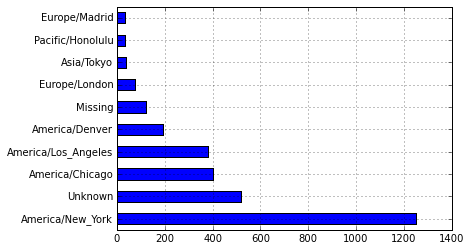

In [12]:
# 그래프로 표현 (p.47)
tz_counts[:10].plot(kind='barh', rot=0)

In [14]:
results = Series([x for x in frame.a.dropna()])
results[:5]
results.value_counts()[:8]

Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2) Gecko/20100101 Firefox/10.0.2    309
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11    229
GoogleMaps/RochesterNY                                          121
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11     93
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)     92
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11     81
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.2.28) Gecko/20120306 Firefox/3.6.28     79
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2     75
dtype: int64

In [16]:
# frame의 'a' 필드의 값이 없는 경우를 걸러낸다
cframe = frame[frame.a.notnull()]

# cframe의 'a' 필드의 문자열이 'Windows'를 포함하면
# 그 값을 'Windows'라고 하고,
# 아니면 'Not Windows'라고 한다.
operating_system = np.where(cframe['a'].str.contains('Windows'),
              'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [17]:
# 표준시간대와 운영체제 기준 관점 생성
by_tz_os = cframe.groupby(['tz', operating_system])

In [18]:
by_tz_os

In [19]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [20]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [21]:
indexer = agg_counts.sum(1).argsort()

In [22]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [26]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


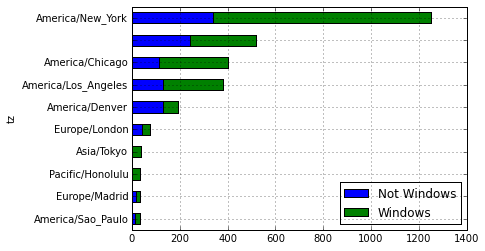

In [27]:
count_subset.plot(kind='barh', stacked=True)

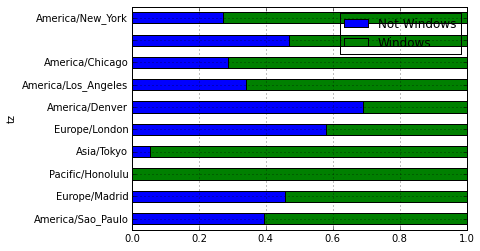

In [29]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## 2.2 MovieLens

In [33]:
import pandas as pd

# 필드명
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('pydata/ch02/movielens/users.dat',
                    sep='::', header=None, names=unames, 
                    encoding='latin1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('pydata/ch02/movielens/ratings.dat',
                     sep='::', header=None, names=rnames,
                     encoding='latin1')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('pydata/ch02/movielens/movies.dat',
                     sep='::', header=None, names=mnames,
                     encoding='latin1')

In [44]:
import os
import pandas as pd
encoding = 'latin1'

upath = os.path.expanduser('pydata/ch02/movielens/users.dat')
rpath = os.path.expanduser('pydata/ch02/movielens/ratings.dat')
mpath = os.path.expanduser('pydata/ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

In [32]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [34]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [35]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [45]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


분석 목표: 성별에 따른 각 영화 평균 평점 산출

In [46]:
mean_ratings = data.pivot_table('rating', 
                                rows='title',
                                cols='gender',
                                aggfunc='mean')

In [40]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


분석 목표: 250건 이상의 평점 정보가 있는 영화만 추려내기

In [47]:
# 각 영화별 평점 정보 개수 추출
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [49]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)'], dtype='object')

In [50]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


분석목표: 여성에게 높은 평점을 받은 영화목록 표시

In [51]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)

In [52]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


분석목표: 성별간 평균 평점 차이

In [53]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [54]:
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


분석목표: 여성이 더 선호하는 영화

In [55]:
sorted_by_diff = mean_ratings.sort_index(by='diff')

In [56]:
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


관점선택: 남성 선호순 상위 15개

In [57]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


분석목표: 성별에 관계없이 차이가 많은 경우 (표준편차 활용)

In [58]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title[:10]

title
$1,000,000 Duck (1971)               1.092563
'Night Mother (1986)                 1.118636
'Til There Was You (1997)            1.020159
'burbs, The (1989)                   1.107760
...And Justice for All (1979)        0.878110
1-900 (1994)                         0.707107
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [59]:
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [60]:
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 2.3 

In [64]:
import pandas as pd

names1880 = pd.read_csv('pydata/ch02/names/yob1880.txt',
                       names=['name', 'sex', 'births'])

In [65]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


분석목표: 해당 연도 각 성별의 출생수 합계

In [66]:
names1880.groupby('sex').births.sum()

sex
F       90993
M      110493
Name: births, dtype: int64

In [73]:
import pandas as pd

years = range(1880,2011) # 연도값 생성

pieces = [] # 데이터 프레임을 담을 배열
columns = ['name', 'sex', 'births']


# 각 연도에 대해 DataFrame 생성
for yr in years:
    # 연도별 데이터 파일 경로 지정
    path = 'pydata/ch02/names/yob%d.txt' % yr
    # print(path) # 생성된 경로 확인
    # 해당 파일을 읽어들여 pandas.DataFrame 생성
    frame = pd.read_csv(path, names=columns)
    # 생성된 DataFrame에 year 필드 추가
    frame['year'] = yr
    # 프레임을 배열에 추가
    pieces.append(frame)
    
# pieces에 담긴 프레임을 단일 프레임으로 합치기
names = pd.concat(pieces, ignore_index=True)

분석목표: 연도별 성별 출생수

In [79]:
total_births = names.pivot_table('births',
                                rows='year',
                                cols='sex',
                                aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


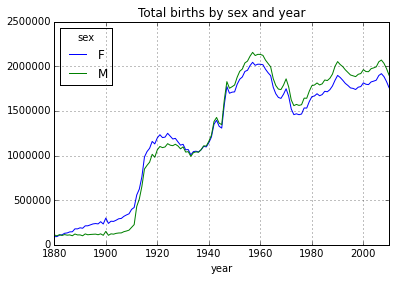

In [82]:
total_births.plot(title='Total births by sex and year')

분석목표: 각 연도별 출생수에서 각 이름의 비율 산출

"영숙아~!"

In [85]:
# 분석목표에 필요한 함수 정의
def add_prop(group):
    # 나누기의 소수점 보존을 위해 정수값을 
    # 소수점을 포함하는 값으로 변환
    # 1 --> 1.0
    births = group.births.astype(float)
    
    # 비율 산출
    group['prop'] = births / births.sum()
    return group

# 연도별, 성별로 분류하기
# 분류된 데이터에 대해 분석 기법 적용
names = names.groupby(['year', 'sex']).apply(add_prop)

In [86]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


데이터 연산 결과 확인
- prop열의 합이 1인가?

In [91]:
import numpy as np # 수치연산 도구

# prop열 합계 구하기
prop_total = names.groupby(['year', 'sex']).prop.sum()

print(type(prop_total))
print(prop_total)

# prop열의 합이 1에 충분히 근접한 값인지 확인
np.allclose(prop_total,1)

<class 'pandas.core.series.Series'>
year  sex
1880  F      1
      M      1
1881  F      1
      M      1
1882  F      1
      M      1
1883  F      1
      M      1
1884  F      1
      M      1
1885  F      1
      M      1
1886  F      1
      M      1
1887  F      1
...
2003  M      1
2004  F      1
      M      1
2005  F      1
      M      1
2006  F      1
      M      1
2007  F      1
      M      1
2008  F      1
      M      1
2009  F      1
      M      1
2010  F      1
      M      1
Name: prop, Length: 262, dtype: float64


True

분석목표: 각 연도별 성별 빈도수 상위 1000개 이름

In [92]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [93]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [96]:
pieces = []
for group_tag, group in names.groupby(['year', 'sex']):
    # print(year_sex, group)
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [98]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### 2.3.1

In [99]:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [100]:
type(boys)

pandas.core.frame.DataFrame

In [101]:
total_births = top1000.pivot_table('births', 
                                   rows='year',
                                   cols = 'name',
                                   aggfunc=sum)

In [102]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11df79790>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x124416310>], dtype=object)

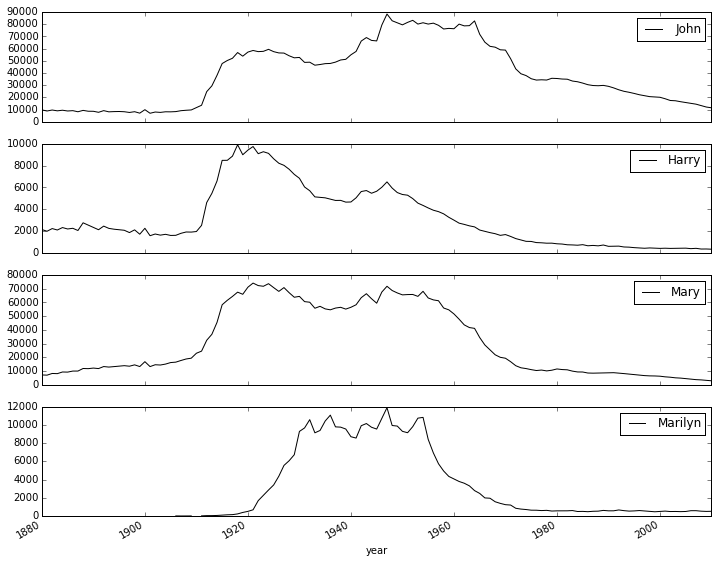

In [103]:
# 일부 이름만 선택
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

# 그래프 그리기
subset.plot(subplots=True, figsize=(12,10), grid=False)

다양한 이름을 사용하는 경향 파악

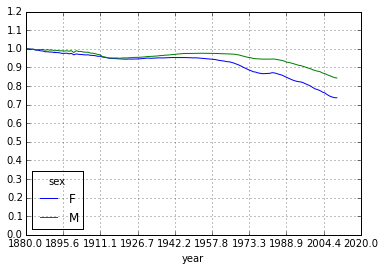

In [104]:
# prop 필드 기준 산출
table = top1000.pivot_table('prop', aggfunc=sum,
                           rows='year', cols='sex')

# 그래프
table.plot(yticks=np.linspace(0,1.2,13), 
           xticks=np.linspace(1880, 2020, 10))

In [105]:
df = boys[boys.year == 2010]

In [106]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [107]:
prop_cumsum = df.sort_index(by='prop', 
                            ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [109]:
type(prop_cumsum)

pandas.core.series.Series

In [121]:
np.array(prop_cumsum).searchsorted(0.5)

116

In [122]:
# 0.13+
type(prop_cumsum.values)

numpy.ndarray

In [124]:
df1900 = boys[boys.year == 1900]
in1900 = df1900.sort_index(by='prop', 
                           ascending=False).prop.cumsum()
# 50%의 위치
in1900.values.searchsorted(0.5)+1

25

In [125]:
def get_quantitle_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantitle_count)
diversity = diversity.unstack('sex')

diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


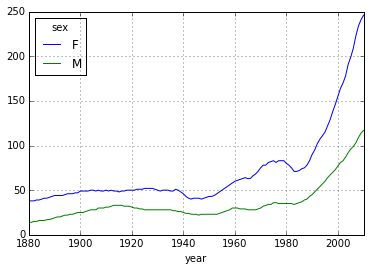

In [126]:
diversity.plot()

분석목표: 마지막 글자 분포 변화 추이

In [132]:
# 마지막 글자를 가져오는 방법
get_last_letter = lambda x: x[-1]

# 현재 데이터에서, name 필드 값의 마지막 글자만 추출
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter' # Series 명칭 지정


table = names.pivot_table('births', 
                          rows=last_letters,
                          cols=['sex', 'year'],
                          aggfunc=sum)

In [129]:
type(last_letters)

pandas.core.series.Series

In [134]:
# 생성된 테이블의 일부만 표시
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [135]:
table

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59442   
b              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c              NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d              609    607    734    810    916    862   1007   1027   1298   
e            33378  34080  40399  41914  48089  49616  53884  54353  66750   
f              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
g                7      5     12      8     24     11     18     25     44   
h             4863   4784   5567   5701   6602   6624   7146   7141   8630   
i               61     78     81     76     84     92     85    105    141   
j              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
k               13     15     11     17     21     18     27     19     21   
l             2541   2911   3527   3848   4808   5144   5721   6175   7900   
m               58     57     81     86     79     75    103     90    123   
n             3008   2959   3576   3837   4507   4735   5242   5512   6833   
o               30     49     35     47     74     84     93     97    134   
p              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
q              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
r              481    417    590    640    718    799    917    910   1207   
s             1391   1316   1637   1794   2039   2127   2524   2803   3582   
t             2152   2165   2399   2554   2825   2889   3017   3140   3816   
u              380    427    410    444    490    495    511    476    541   
v              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
w              NaN      5    NaN    NaN    NaN    NaN      5    NaN    NaN   
x              NaN    NaN    NaN      7    NaN    NaN    NaN    NaN    NaN   
y            10469  10404  12145  12063  13917  13927  14936  14980  17931   
z              106     95    106    141    148    150    202    188    238   

sex                 ...         M                                          \
year          1889  ...      2001    2002    2003    2004    2005    2006   
last_letter         ...                                                     
a            58631  ...     39124   38815   37825   38650   36838   36156   
b              NaN  ...     50950   49284   48065   45914   43144   42600   
c              NaN  ...     27113   27238   27697   26778   26078   26635   
d             1374  ...     60838   55829   53391   51754   50670   51410   
e            66663  ...    145395  144651  144769  142098  141123  142999   
f              NaN  ...      1758    1817    1819    1904    1985    1968   
g               28  ...      2151    2084    2009    1837    1882    1929   
h             8826  ...     85959   88085   88226   89620   92497   98477   
i              134  ...     20980   23610   26011   28500   31317   33558   
j              NaN  ...      1069    1088    1203    1094    1291    1241   
k               22  ...     42477   42043   42296   41400   42151   42537   
l             8395  ...    153648  153493  153862  152800  155312  156234   
m              137  ...     41967   42663   42790   43054   41600   42503   
n             7103  ...    616099  630322  663419  676011  686326  720998   
o              142  ...     82146   83180   85423   88822   92001   96350   
p              NaN  ...      3419    3157    2982    2841    2768    2721   
q              NaN  ...       602     618     585     523     446     430   
r             1214  ...    165377  164821  169878  169452  172069  176490   
s             3569  ...    143791  139595  138632  139642  139913  143232   
t             3784  ...     47688   44991  

In [136]:
subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

In [137]:
letter_prop = subtable/subtable.sum().astype(float)

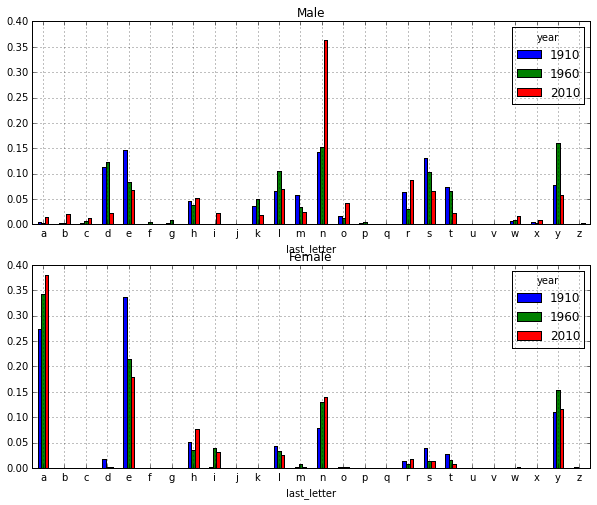

In [142]:
import matplotlib.pyplot as plt

# 그래프 설정
fig, axes = plt.subplots(2,1, figsize=(10,8))
# 남자 이름 그래프 출력
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0],
                     title='Male')
# 여자 이름 그래프 출력
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1],
                     title='Female')

분석목표: d/n/y로 끝나는 이름을 가진 남자 출생 비율

In [151]:
# 각 문자의 비율 산출
letter_prop = table / table.sum().astype(float)
# 대상문자의 비율만 추출
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [152]:
type(dny_ts)

pandas.core.frame.DataFrame

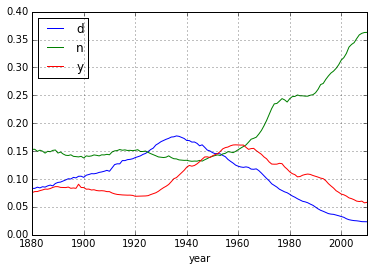

In [153]:
dny_ts.plot()

분석 목표: 혼성이름 비율

In [154]:
all_names = top1000.name.unique()

In [155]:
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Yousef', 'Joziah', 'Maxton'], dtype=object)

In [156]:
len(all_names) # 고유한 이름의 개수

6868

In [157]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [158]:
# 혼성 이름 lesley 및 그와 유사한 이름들
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

In [159]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [160]:
# 대상 이름들을 걸러내기
filtered = top1000[top1000.name.isin(lesley_like)]

In [161]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [163]:
# 연도와 성별 관점으로 정리
table = filtered.pivot_table('births', rows='year', 
                             cols='sex', aggfunc=sum)
# 출생 연도로 정규화
table = table.div(table.sum(1), axis=0)

table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


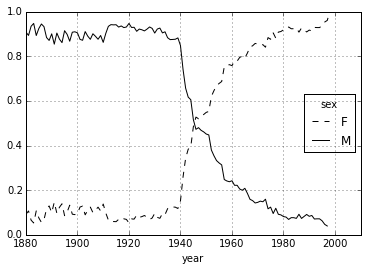

In [164]:
table.plot(style={'M':'k-', 'F': 'k--'})